In [1]:
from keras.datasets import mnist
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

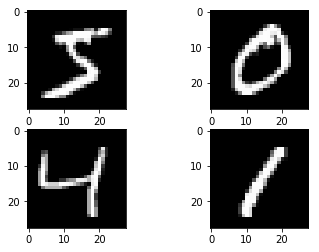

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

## Baseline model with multi-layer perceptrons

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [10]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape
# flatten 28*28 images to a 784 vector for each image and forcing the precision of the pixel values to be 32 bit
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(60000, 784)
(10000, 784)


In [11]:
# perform the scaling of input values, normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [15]:
# use one hot encoding of the class values to transform the vector of class integers into a binary matrix
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
# print y_test.shape
# create simple neural network model as baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Structure
* one hidden layer
 * the same No. of neurons as there are inputs(784)
 * A rectifier activation function used for the neurons
* output layer
 * softmax activation function used to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model's output prediction
 * Logarithmic loss used as loss function(called categorical_crossentropy in Keras)
 * ADAM gradient descent algorithm used to learn the weights

### fit & evaluate the model
* fit over 10 epochs with updates every 200 images
* test data used as the validation dataset to see the skill of the model as it trains
* verbose of 2 to reduce the output to one line for each training epoch
* test dataset is used to evaluate the model and a classification error rate is printed

In [18]:
# build the model
model = baseline_model()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print 'Baseline Error: %.2f%%' %(100-scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
26s - loss: 0.2838 - acc: 0.9186 - val_loss: 0.1416 - val_acc: 0.9583
Epoch 2/10
16s - loss: 0.1136 - acc: 0.9667 - val_loss: 0.0940 - val_acc: 0.9718
Epoch 3/10
17s - loss: 0.0736 - acc: 0.9789 - val_loss: 0.0798 - val_acc: 0.9763
Epoch 4/10
17s - loss: 0.0523 - acc: 0.9851 - val_loss: 0.0743 - val_acc: 0.9775
Epoch 5/10
19s - loss: 0.0387 - acc: 0.9892 - val_loss: 0.0694 - val_acc: 0.9786
Epoch 6/10
25s - loss: 0.0278 - acc: 0.9924 - val_loss: 0.0662 - val_acc: 0.9796
Epoch 7/10
21s - loss: 0.0218 - acc: 0.9943 - val_loss: 0.0602 - val_acc: 0.9817
Epoch 8/10
19s - loss: 0.0143 - acc: 0.9969 - val_loss: 0.0608 - val_acc: 0.9812
Epoch 9/10
16s - loss: 0.0118 - acc: 0.9973 - val_loss: 0.0563 - val_acc: 0.9819
Epoch 10/10
17s - loss: 0.0088 - acc: 0.9983 - val_loss: 0.0584 - val_acc: 0.9822
Baseline Error: 1.78%
